In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from itertools import product, combinations
%matplotlib inline

In [2]:
def downcast_type(df):
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype == 'int64']
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    
    return df

In [3]:
datadir = '../data/raw'
item_categories = pd.read_csv(os.path.join(datadir, 'item_categories.csv'))
item = pd.read_csv(os.path.join(datadir, 'items.csv'))
train = pd.read_csv(os.path.join(datadir, 'sales_train_v2.csv'))
shops = pd.read_csv(os.path.join(datadir, 'shops.csv'))
test = pd.read_csv(os.path.join(datadir, 'test.csv'))

## Data cleansing and preparation
Remove outliers, aggregate sales by month, filter out shops not included in test data, and mimic test data distribution by including 0 sales shop-item pairs

0     999.00
1     899.00
2     899.00
3    1709.05
Name: item_price, dtype: float64


Text(0.5, 1.0, 'item count')

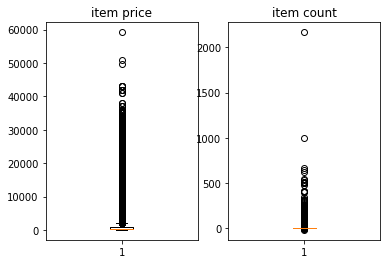

In [4]:
selected = train[train['item_price'] < 100000]['item_price']
print(selected.head(4))
fig, ax = plt.subplots(1, 2)
#fig, ax = plt.subplots()
ax[0].boxplot(selected)
ax[0].set_title('item price')
ax[1].boxplot(train['item_cnt_day'])
ax[1].set_title('item count')

Remove item :
    *  price > 100,000
    *  price < 0
    *  count > 1000

In [5]:
train = train[(train['item_price'] < 100000) & (train['item_price'] > 0) & (train['item_cnt_day'] <= 1000)]

Make sure all shops and item in train are in test

In [6]:
train = train[train['shop_id'].isin(test['shop_id'].unique())]
train = train[train['item_id'].isin(test['item_id'].unique())]

In [7]:
#train.groupby(['date_block_num'])['item_cnt_day','item_price'].apply(lambda x: x.sum())
test[(test['shop_id'] == 59) & (test['item_id'] == 2574)].head(10)

,ID,shop_id,item_id
148320,148320,59,2574


In [35]:
# trying to workout what product does
sh = train[train['date_block_num'] == 1]['shop_id'].unique()
it = train[train['date_block_num'] == 1]['item_id'].unique()
pr = product(sh, it)
np.array(list(pr)).shape

(32436, 2)

In [38]:
# trying to workout what product does
sh = train[train['date_block_num'] == 1]['shop_id'].unique()
it = train[train['date_block_num'] == 1]['item_id'].unique()
pr = product(sh, it, [3])
np.array(list(pr))

array([[   50,  3897,     3],
       [   50,  3851,     3],
       [   50,  3871,     3],
       ...,
       [   28,  8779,     3],
       [   28, 10609,     3],
       [   28, 14110,     3]], dtype=int64)

In [39]:
monthly_sales = []
for i in range(34):
    month_sales = train[train['date_block_num'] == i]
    monthly_sales.append(np.array(list(product(month_sales['shop_id'].unique(), month_sales['item_id'].unique(), [i])), dtype='int16'))

index_cols = ['shop_id', 'item_id', 'date_block_num']    
test['date_block_num'] = 34
monthly_sales.append(test[index_cols])

In [43]:
in = pd.DataFrame(np.vstack())

[array([[   59, 22154,     0],
        [   59,  2574,     0],
        [   59,  2607,     0],
        ...,
        [   45,  5472,     0],
        [   45,  9978,     0],
        [   45, 10653,     0]], dtype=int16), array([[   50,  3897,     1],
        [   50,  3851,     1],
        [   50,  3871,     1],
        ...,
        [   28,  8779,     1],
        [   28, 10609,     1],
        [   28, 14110,     1]], dtype=int16), array([[    2,    31,     2],
        [    2,  2416,     2],
        [    2,  2252,     2],
        ...,
        [    4, 19110,     2],
        [    4,  8855,     2],
        [    4, 10649,     2]], dtype=int16)]